<h2>Daten importieren und leere dteday Spalte auffüllen<h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Datenimport
data = pd.read_csv("hour.csv")
#Neuer Datenimport für die Verbesserung
data_verbesserung = pd.read_csv("hour.csv")

data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = data['dteday'].dt.day

#Indexspalte entfernen
data = data.drop(['instant'], axis=1)


In [2]:
print(data.describe())

             dteday        season            yr          mnth            hr  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean      15.683411      2.501640      0.502561      6.537775     11.546752   
std        8.789373      1.106918      0.500008      3.438776      6.914405   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%        8.000000      2.000000      0.000000      4.000000      6.000000   
50%       16.000000      3.000000      1.000000      7.000000     12.000000   
75%       23.000000      3.000000      1.000000     10.000000     18.000000   
max       31.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431    

<h2>Stündliche Buchungen nach Jahreszeit: Wochentage, Wochenenden und Feiertage im Vergleich<h2>

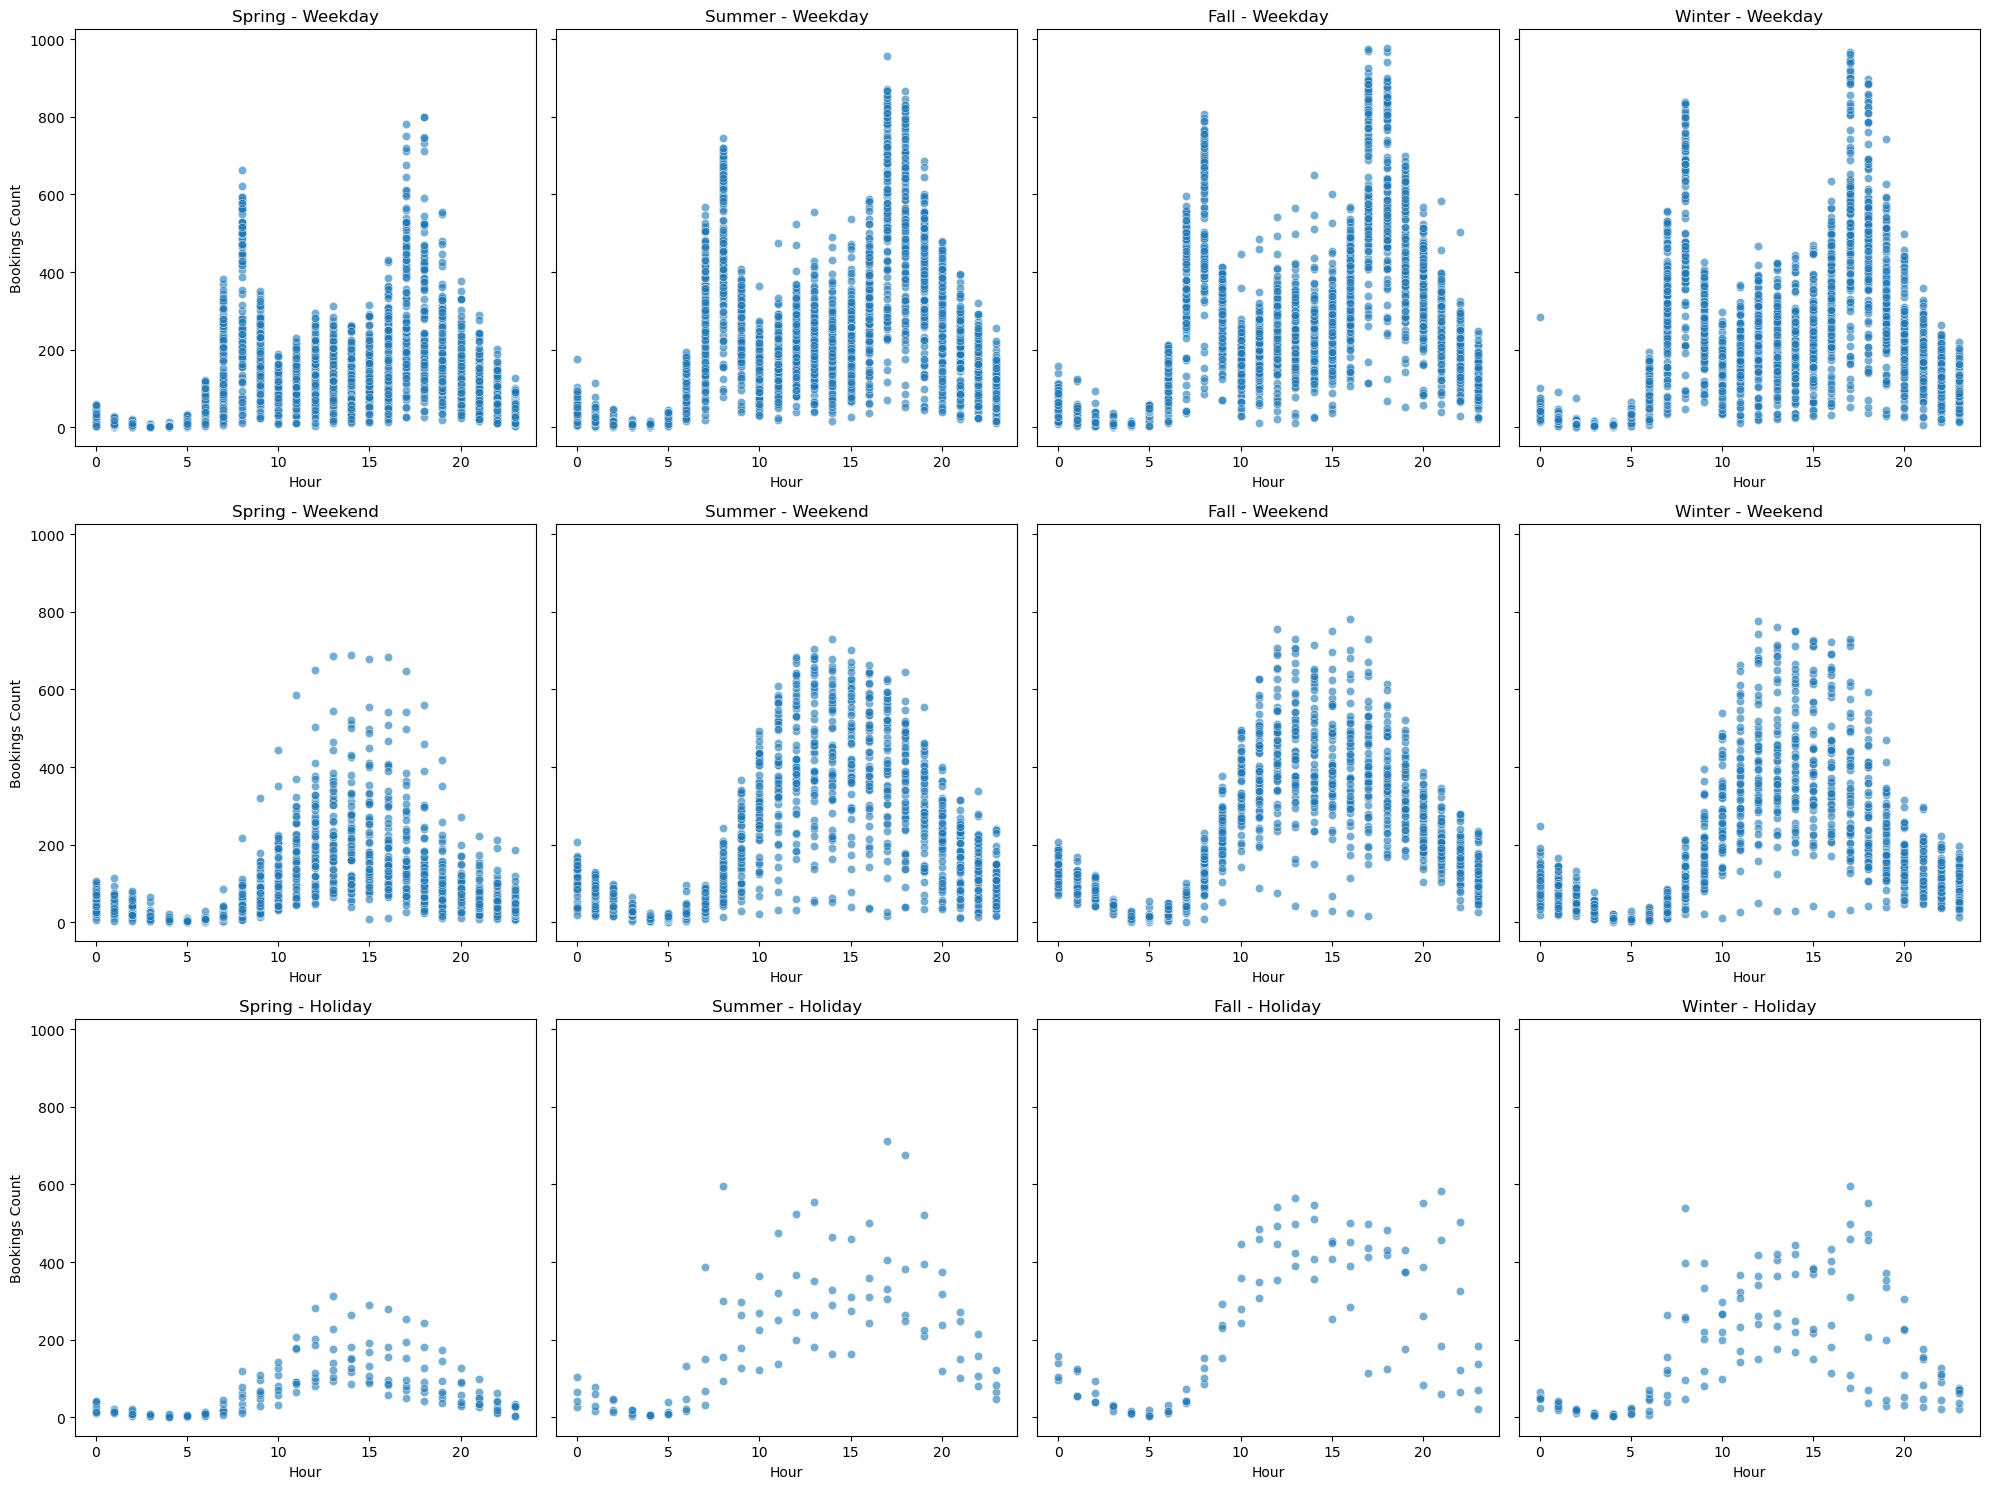

In [3]:
#Datenaufbereitung
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)

season_labels = ["Spring", "Summer", "Fall", "Winter"]

#Subplots vorbereiten
for i, season in enumerate([1, 2, 3, 4]):
    season_data = data[data['season'] == season]
    
    weekday_data = season_data[season_data['is_weekend'] == 0]
    sns.scatterplot(ax=axes[0, i], data=weekday_data, x='hr', y='cnt', alpha=0.6)
    axes[0, i].set_title(f"{season_labels[i]} - Weekday")
    axes[0, i].set_xlabel("Hour")
    axes[0, i].set_ylabel("Bookings Count")
    
    weekend_data = season_data[season_data['is_weekend'] == 1]
    sns.scatterplot(ax=axes[1, i], data=weekend_data, x='hr', y='cnt', alpha=0.6)
    axes[1, i].set_title(f"{season_labels[i]} - Weekend")
    axes[1, i].set_xlabel("Hour")
    axes[1, i].set_ylabel("Bookings Count")
    
    holiday_data = season_data[season_data['holiday'] == 1]
    sns.scatterplot(ax=axes[2, i], data=holiday_data, x='hr', y='cnt', alpha=0.6)
    axes[2, i].set_title(f"{season_labels[i]} - Holiday")
    axes[2, i].set_xlabel("Hour")
    axes[2, i].set_ylabel("Bookings Count")

plt.tight_layout()
plt.show()

<h2>Visualisierung von Arbeitstagbuchungen nach Jahreszeit<h2>

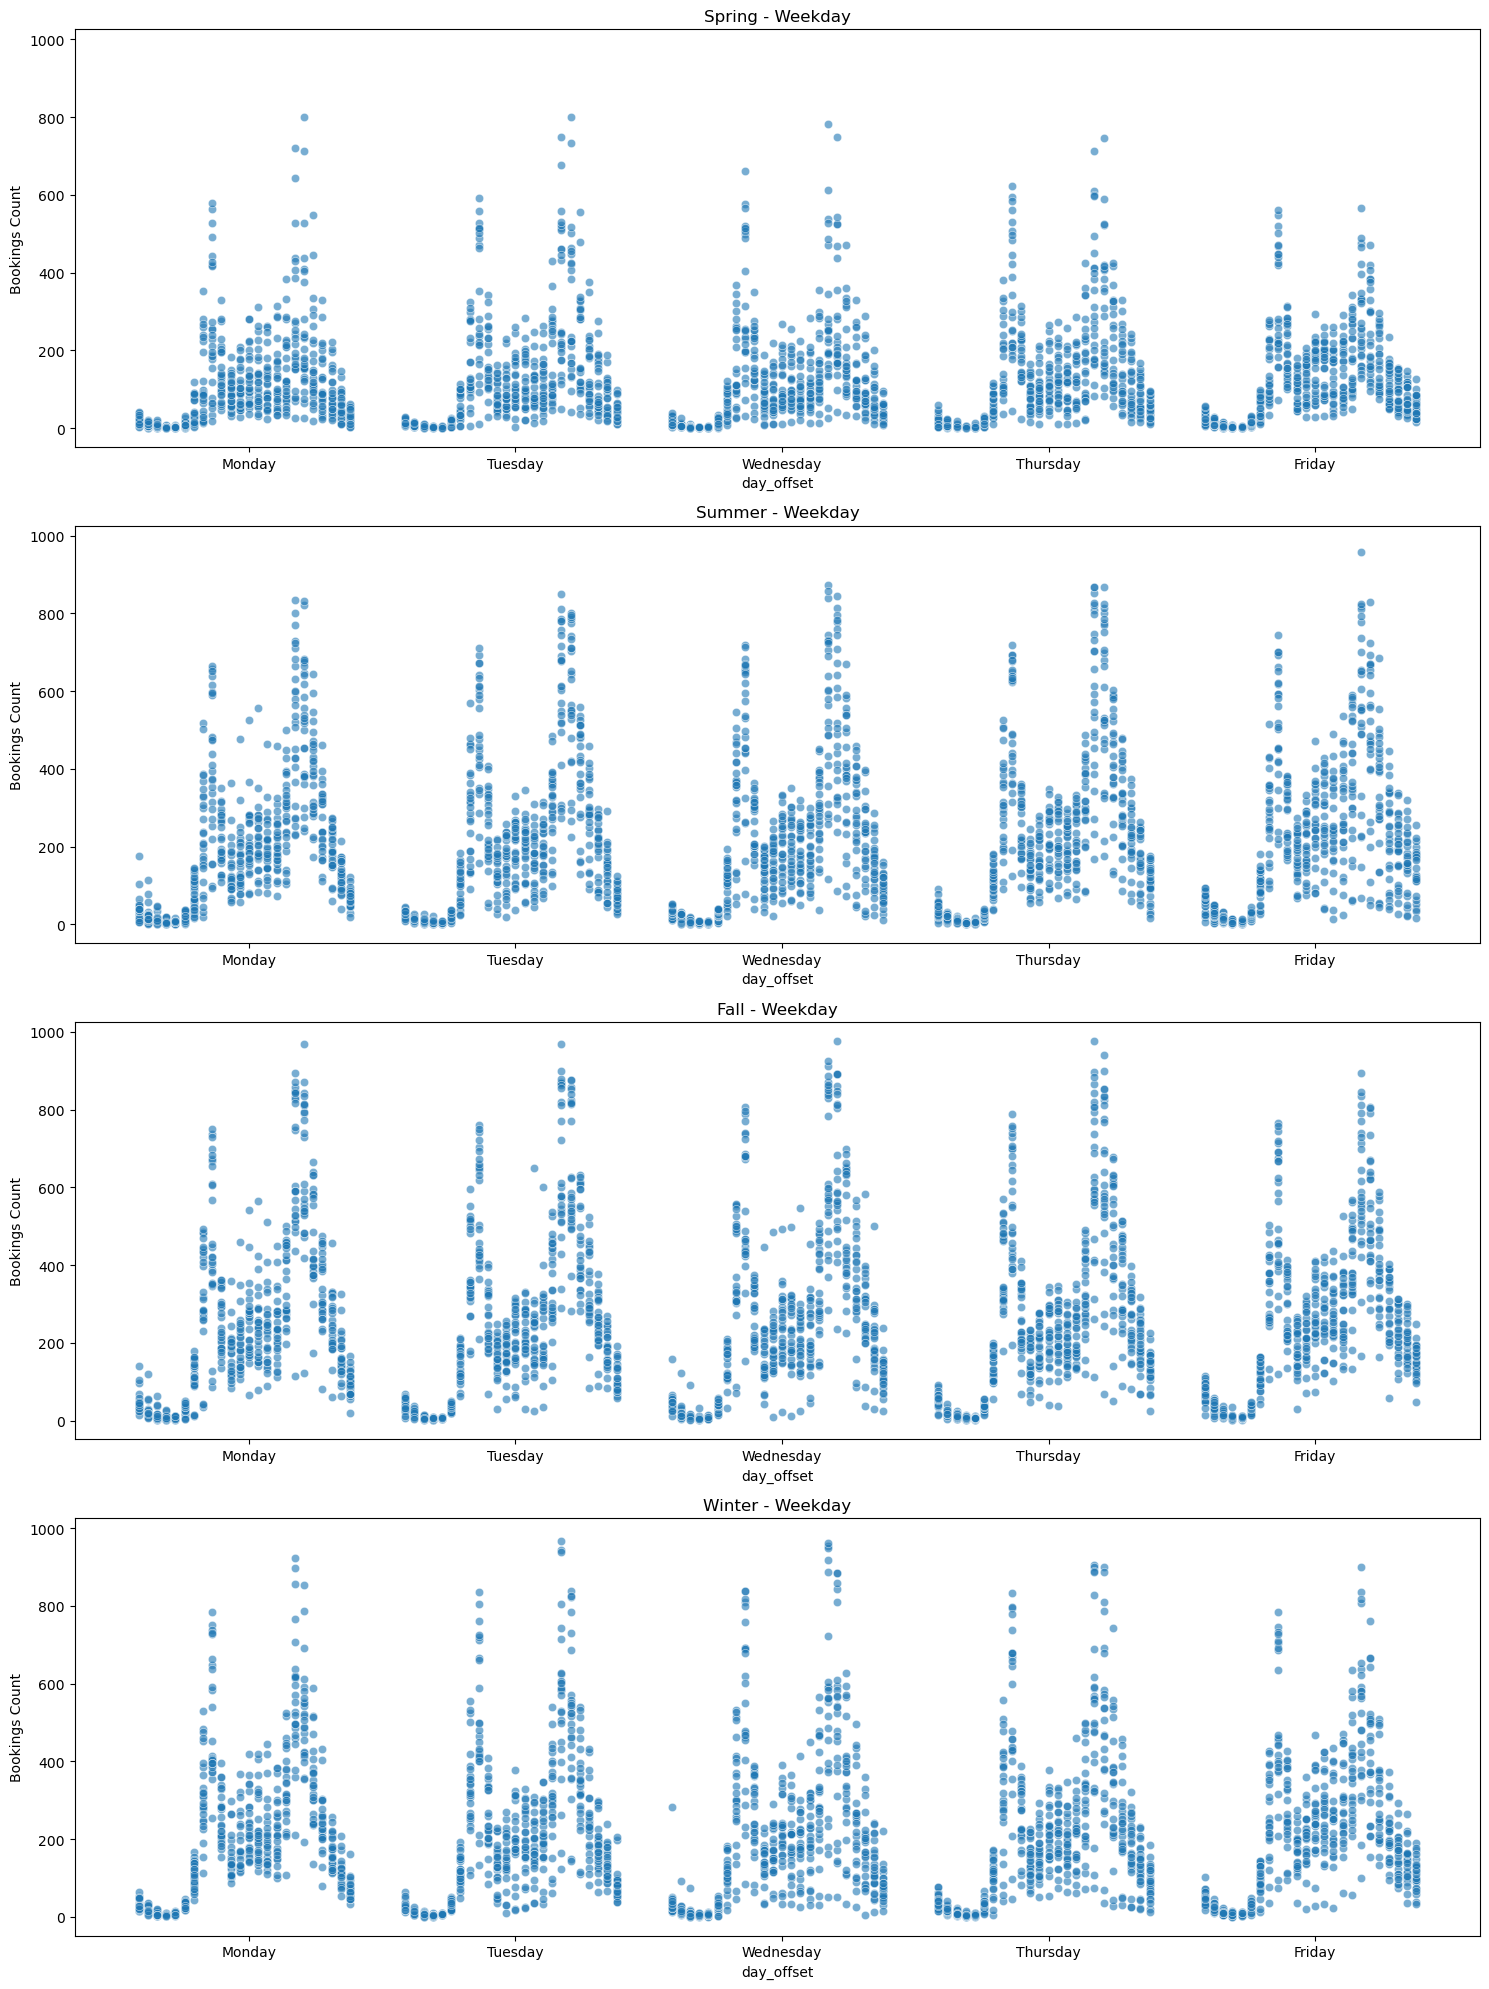

In [4]:
#Datenaufbereitung
gap = 5  # Abstand zwischen den Tagen
data['day_offset'] = data['weekday'] * (24 + gap) + data['hr']

season_labels = ["Spring", "Summer", "Fall", "Winter"]

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_indices = [1, 2, 3, 4, 5]  # Indizes der Tage, die bleiben

fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=False, sharey=True)

# Subplots vorbereiten
for season_idx, season in enumerate([1, 2, 3, 4]):
    season_data = data[data['season'] == season]

    # Daten für Weekday filtern (nur `is_weekend == 0`)
    weekday_data = season_data[season_data['is_weekend'] == 0]

    sns.scatterplot(ax=axes[season_idx], data=weekday_data, x='day_offset', y='cnt', alpha=0.6)
    axes[season_idx].set_title(f"{season_labels[season_idx]} - Weekday")
    axes[season_idx].set_ylabel("Bookings Count")

    xticks_positions = [(i * (24 + gap) + 12) for i in weekday_indices]  # Mitte der Tage
    axes[season_idx].set_xticks(xticks_positions)
    axes[season_idx].set_xticklabels(weekday_labels)

plt.tight_layout()
plt.show()

<h2>Visualisierung von Wochenendbuchungen nach Jahreszeit<h2>

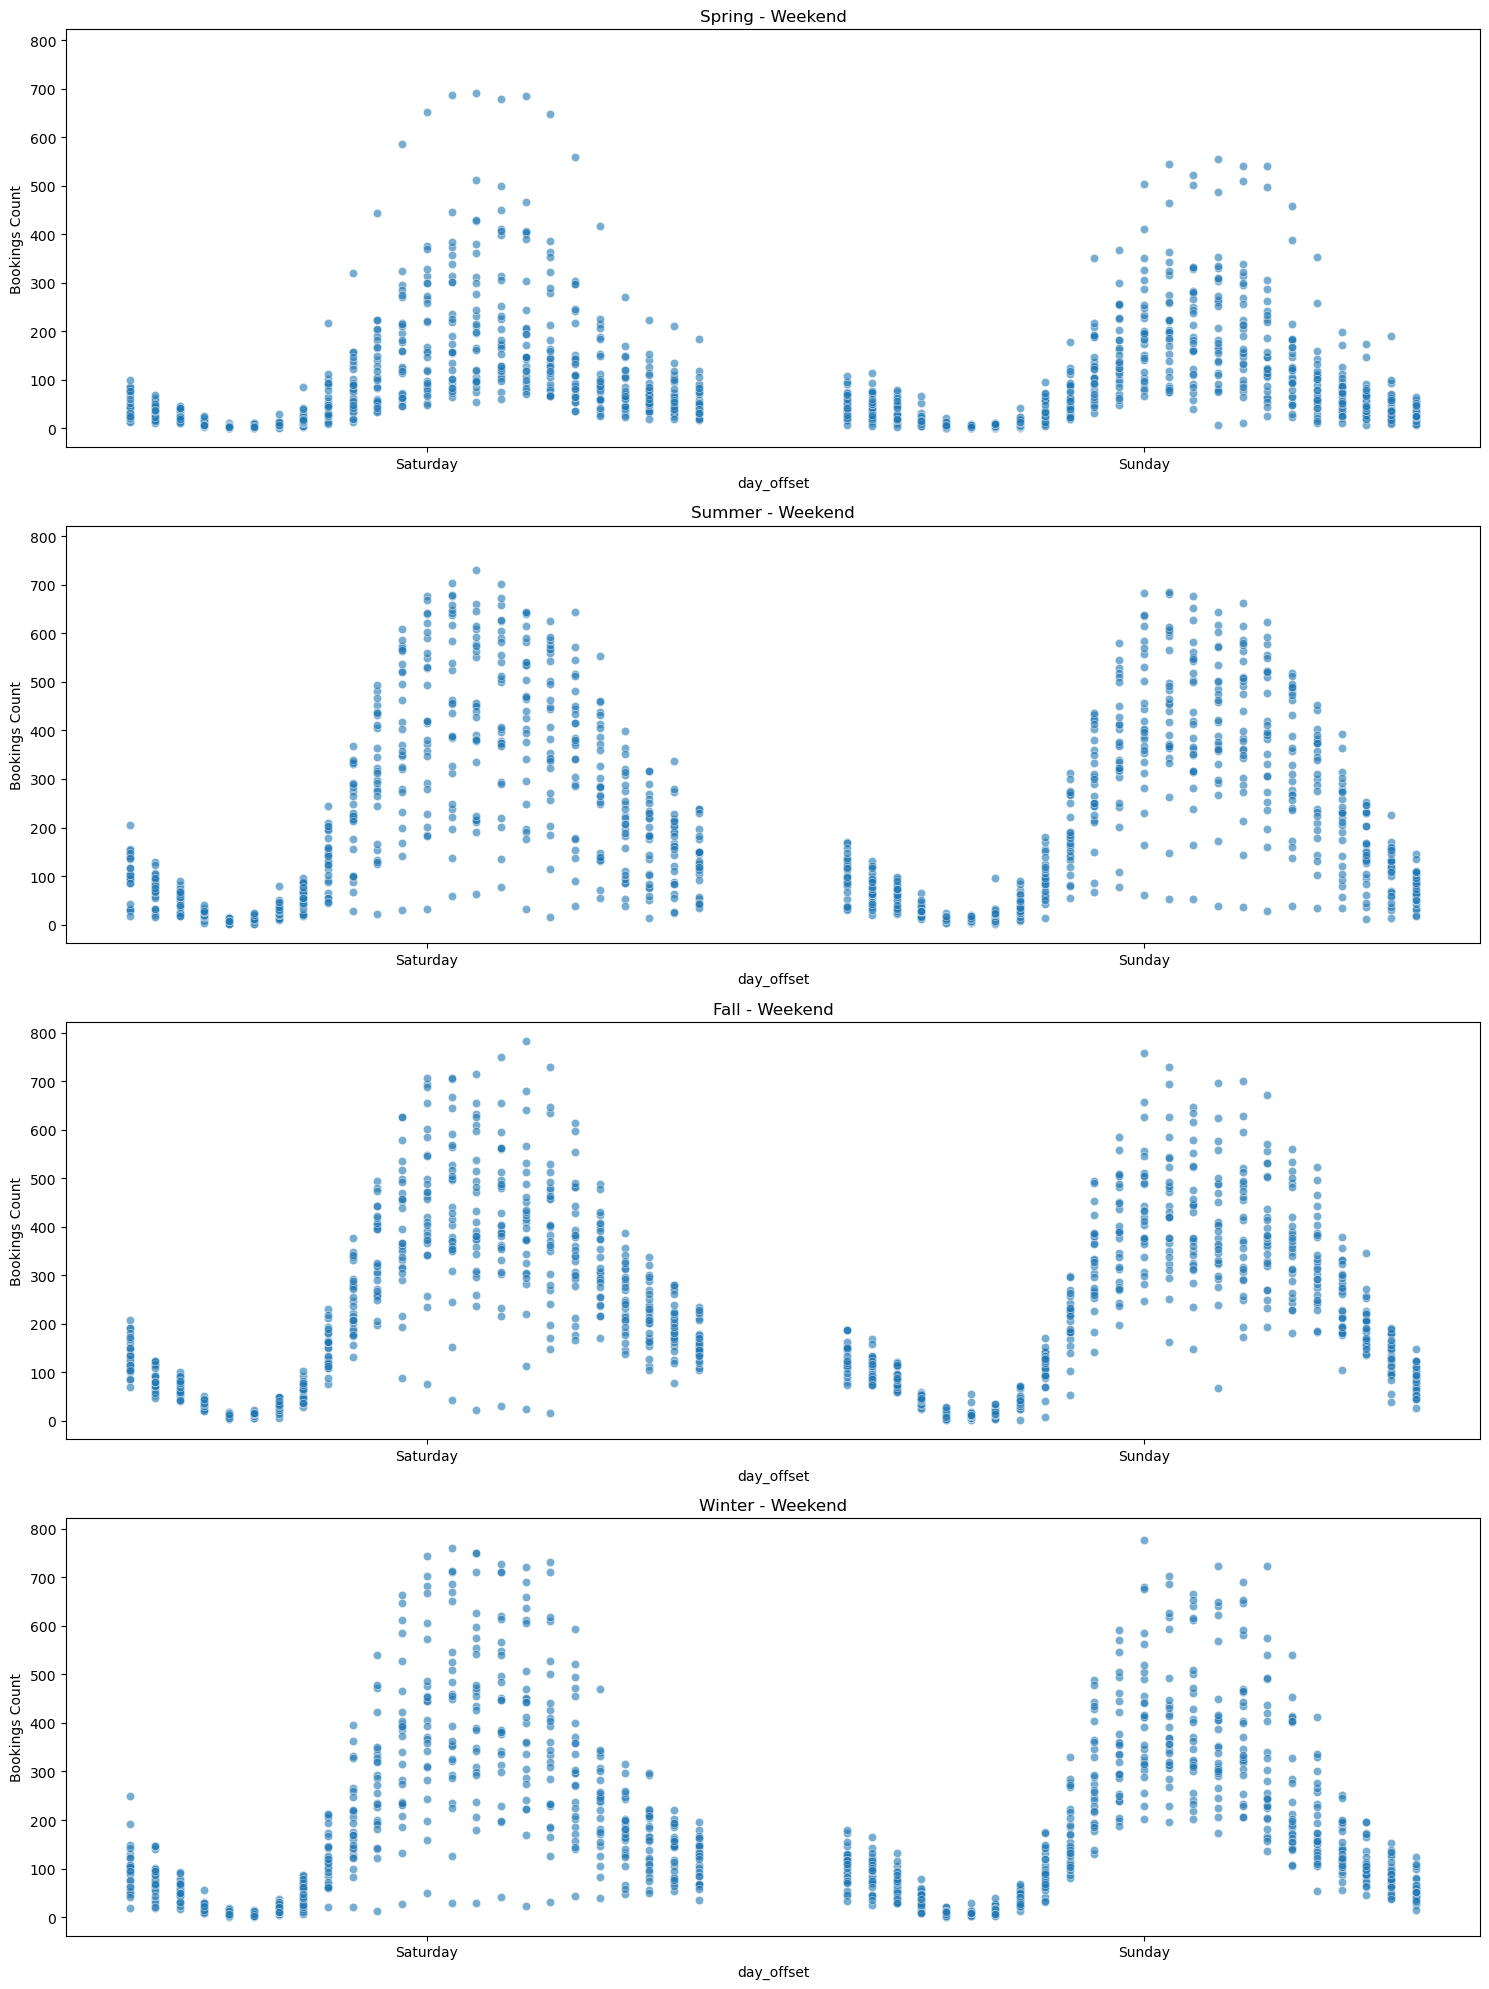

In [5]:
# Datenaufbereitung
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

gap = 5  
data['day_offset'] = data['weekday'].replace({0: 1, 6: 0}) * (24 + gap) + data['hr']


season_labels = ["Spring", "Summer", "Fall", "Winter"]

weekend_labels = ['Saturday', 'Sunday']

# Subplots vorbereiten
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=False, sharey=True) 

for season_idx, season in enumerate([1, 2, 3, 4]):
    season_data = data[data['season'] == season]

    weekend_data = season_data[season_data['weekday'].isin([0, 6])]

    sns.scatterplot(ax=axes[season_idx], data=weekend_data, x='day_offset', y='cnt', alpha=0.6)
    axes[season_idx].set_title(f"{season_labels[season_idx]} - Weekend")
    axes[season_idx].set_ylabel("Bookings Count")

    xticks_positions = [12, 36 + gap]  
    axes[season_idx].set_xticks(xticks_positions)
    axes[season_idx].set_xticklabels(weekend_labels)

plt.tight_layout()
plt.show()

<h2>Visualisierung von Feiertagsbuchungen nach Jahreszeit<h2>

C:\Users\felip\AppData\Local\Temp\ipykernel_35488\2673958218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_data['day_offset'] = offset + holiday_data['weekday'] * (24 + gap) + holiday_data['hr']


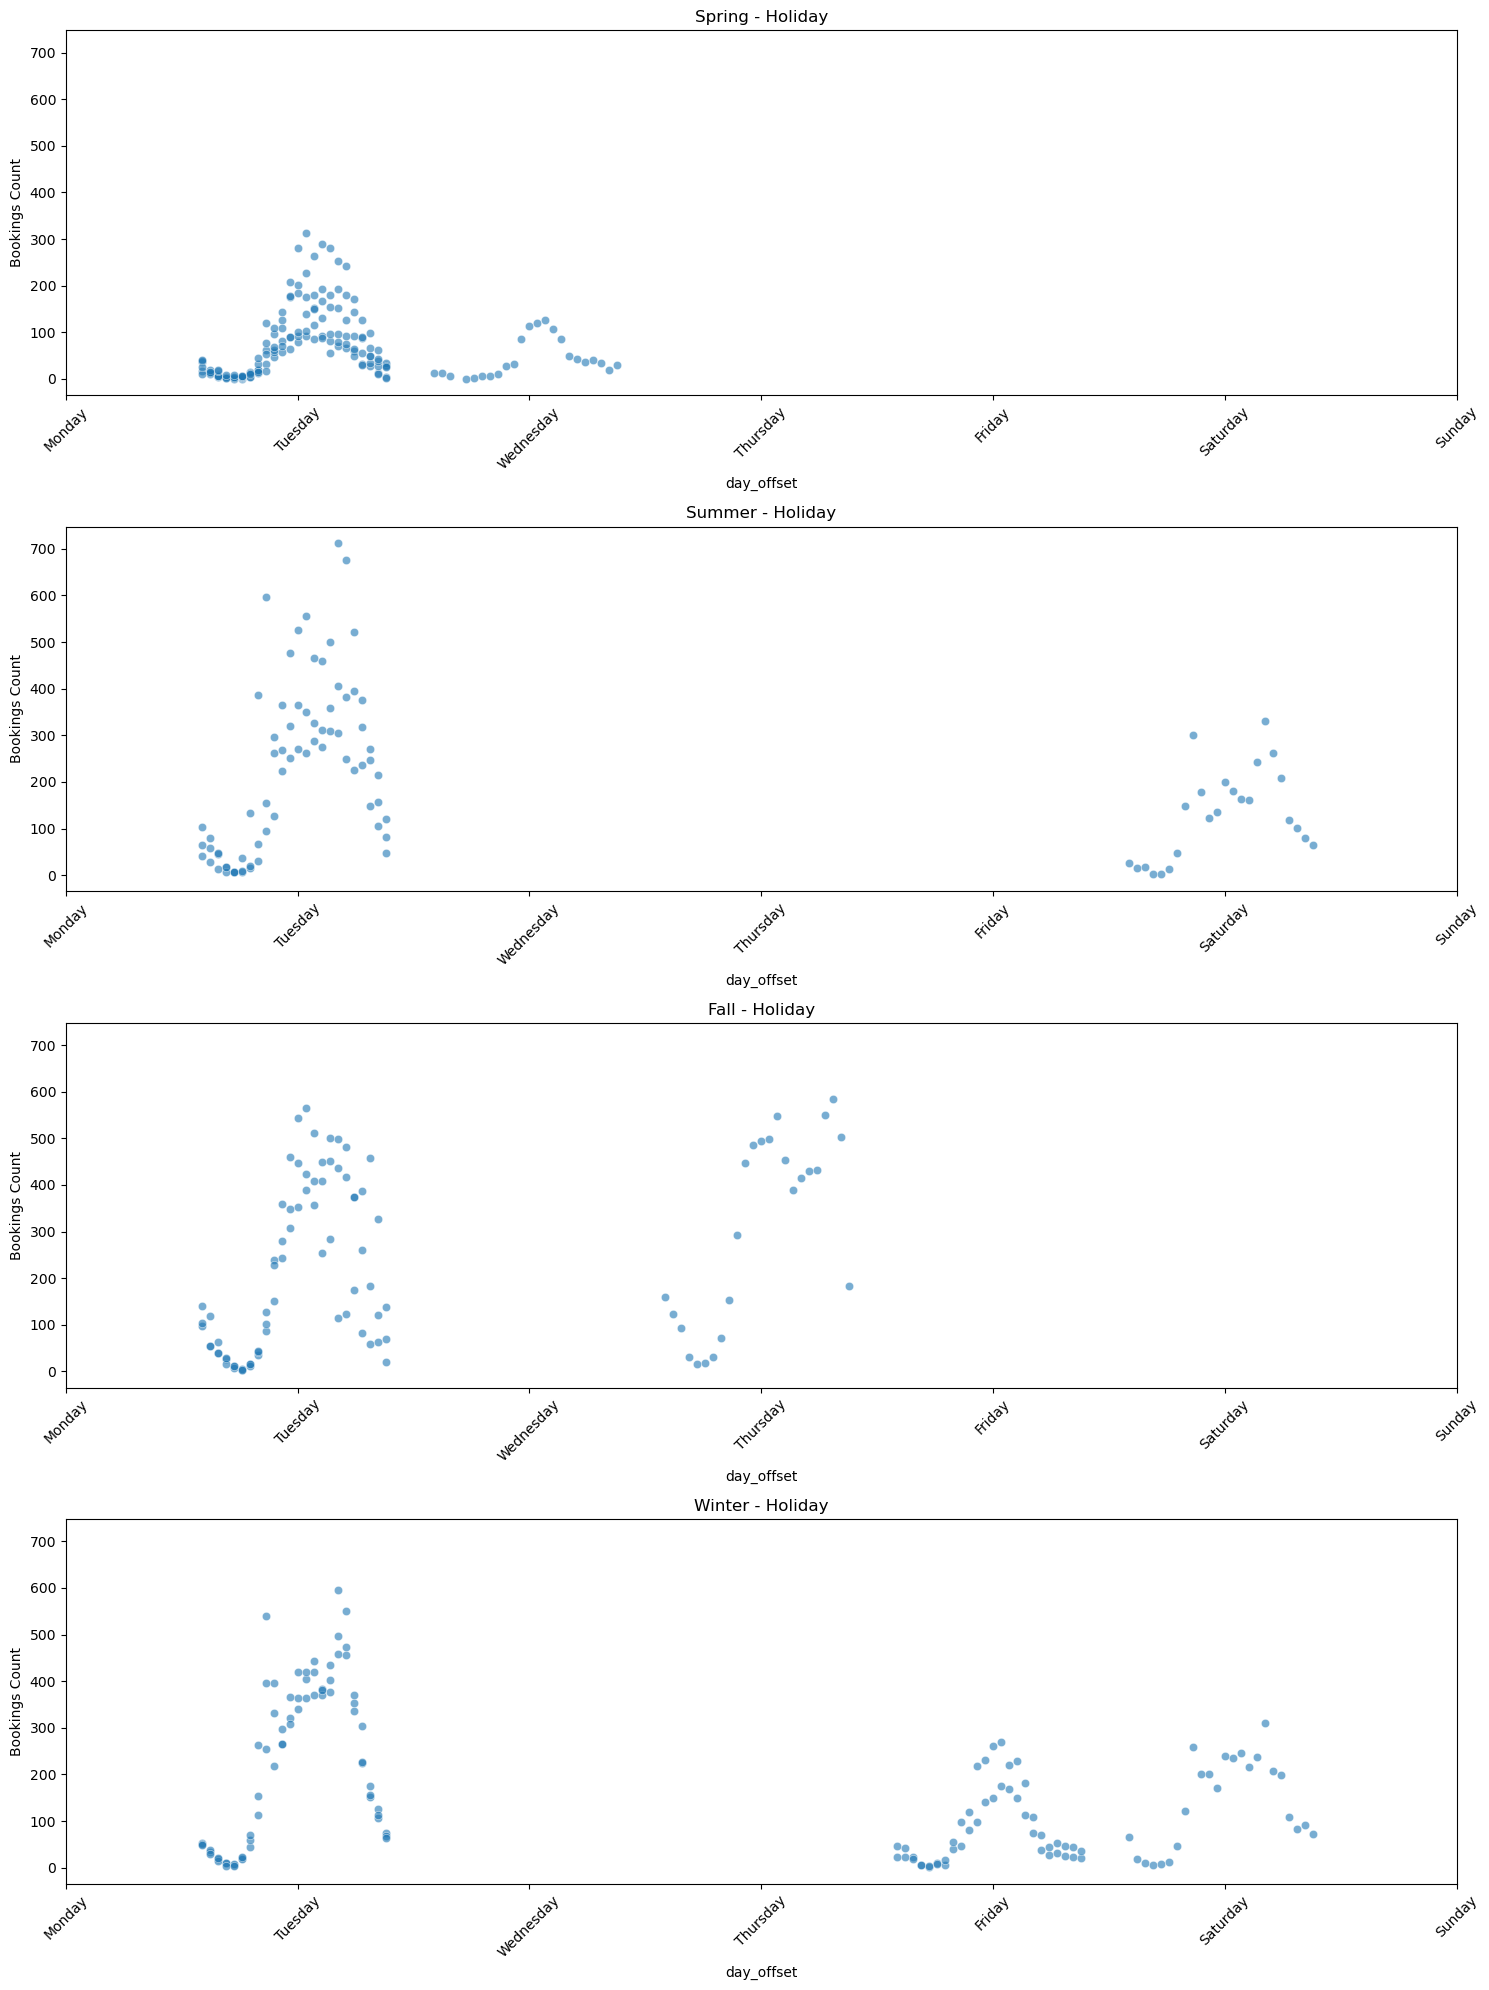

In [6]:
holiday_data = data[data['holiday'] == 1]

offset = 50  
gap = 5 
holiday_data['day_offset'] = offset + holiday_data['weekday'] * (24 + gap) + holiday_data['hr']

season_labels = ["Spring", "Summer", "Fall", "Winter"]

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=False, sharey=True) 

#Subplots vorbereiten
for season_idx, season in enumerate([1, 2, 3, 4]):
    season_data = holiday_data[holiday_data['season'] == season]

    sns.scatterplot(ax=axes[season_idx], data=season_data, x='day_offset', y='cnt', alpha=0.6)
    axes[season_idx].set_title(f"{season_labels[season_idx]} - Holiday")
    axes[season_idx].set_ylabel("Bookings Count")

    xticks_positions = [offset + (i * (24 + gap) + 12) for i in range(7)] 
    axes[season_idx].set_xticks(xticks_positions)
    axes[season_idx].set_xticklabels(weekday_labels)
    axes[season_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<h2>Visualisierung der Korrelationsmatrix<h2>

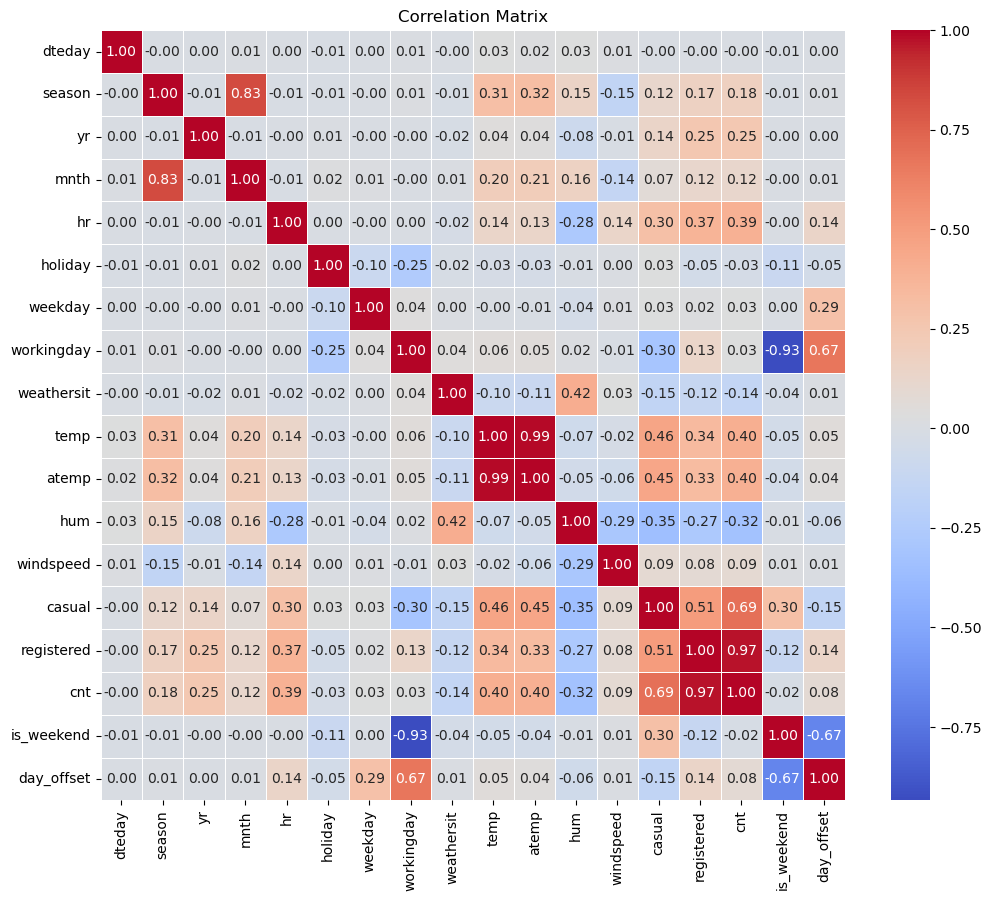

In [7]:
import seaborn as sns
corr_matrix = data.corr()

# Plot the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<h2>Spalten entfernen<h2>

In [8]:
data = data.drop(['dteday', 'mnth', 'yr', 'weathersit', 'hum', 'windspeed','holiday', 'casual', 'registered', 'day_offset', 'is_weekend'], axis=1)

<h2>Durchschnittliche Anzahl der Vermietungen nach Stunde des Tages<h2>

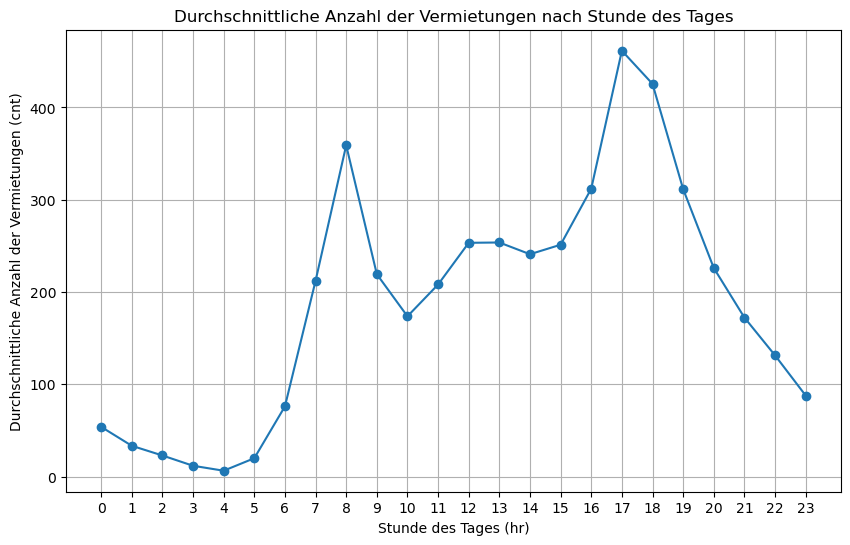

In [9]:
# Annahme: Der Datensatz ist bereits in 'dataset' geladen und enthält die Spalten 'hr' und 'cnt'

# Mittelwert der Vermietungen pro Stunde berechnen
hourly_counts = data.groupby('hr')['cnt'].mean().reset_index()

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts['hr'], hourly_counts['cnt'], marker='o')
plt.title('Durchschnittliche Anzahl der Vermietungen nach Stunde des Tages')
plt.xlabel('Stunde des Tages (hr)')
plt.ylabel('Durchschnittliche Anzahl der Vermietungen (cnt)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


<h2>Training/Test Splitt

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_log_error
import numpy as np

dataset_np = data.to_numpy()

X = dataset_np[:, :6]
Y = dataset_np[:, 6]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=22)

<h2>Random Forest Regressors mit Grid Search<h2>

In [11]:
parameters = {
    'n_estimators': [1000],
    'max_depth': [4, 8, 12, 16],
    'min_samples_split': [2, 5]
}

rgr = RandomForestRegressor(random_state=3)
gs = GridSearchCV(rgr, parameters)
gs.fit(XTrain, YTrain)

print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)

# Vorhersagen für Testdaten
best_model = gs.best_estimator_
YTest_pred_rnf = best_model.predict(XTest)

# Mean Squared Error und R²-Score berechnen
mse_test = mean_squared_error(YTest, YTest_pred_rnf)
r2_test = r2_score(YTest, YTest_pred_rnf)

print(f"Testdaten-MSE: {mse_test:.4f}")
print(f"Testdaten-R²: {r2_test:.4f}")

Beste Parameter: {'max_depth': 12, 'min_samples_split': 5, 'n_estimators': 1000}
Bestes Score: 0.8095087050748224
Testdaten-MSE: 6253.0670
Testdaten-R²: 0.8107


<h2>Lineare Regression (Polynomial) mit Gridsearch<h2>

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, RegressorMixin

class PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=1):
        self.degree = degree
        self.linear_model = LinearRegression()
        self.poly_features = None

    def fit(self, X, y):
        self.poly_features = PolynomialFeatures(degree=self.degree)
        X_poly = self.poly_features.fit_transform(X)
        self.linear_model.fit(X_poly, y)
        return self

    def predict(self, X):
        X_poly = self.poly_features.transform(X)
        return self.linear_model.predict(X_poly)

parameters = {
    'degree': [5, 6, 7, 8]  # Grad des Polynoms
}

poly_reg = PolynomialRegression()
gs = GridSearchCV(poly_reg, parameters)
gs.fit(XTrain, YTrain)

print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)

# Vorhersagen für Testdaten
best_model = gs.best_estimator_
YTest_pred_lr = best_model.predict(XTest)

# Mean Squared Error und R²-Score berechnen
mse_test = mean_squared_error(YTest, YTest_pred_lr)
r2_test = r2_score(YTest, YTest_pred_lr)

# Mean Squared Error und R²-Score berechnen
print(f"Testdaten-MSE: {mse_test:.4f}")
print(f"Testdaten-R²: {r2_test:.4f}")

Beste Parameter: {'degree': 6}
Bestes Score: 0.5982824640537455
Testdaten-MSE: 12378.4820
Testdaten-R²: 0.6252


<h2>KNNRegressor mit Gridsearch<h2>

In [13]:
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 für Manhattan-Distanz, p=2 für euklidische Distanz
}

knn = KNeighborsRegressor()
gs = GridSearchCV(knn, parameters)
gs.fit(XTrain, YTrain)

# Ausgabe der besten Parameter und des besten Scores
print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)

# Vorhersagen für Testdaten
best_model = gs.best_estimator_
YTest_pred_knn = best_model.predict(XTest)

# Berechnung der Scores
mse_test = mean_squared_error(YTest, YTest_pred_knn)
r2_test = r2_score(YTest, YTest_pred_knn)

# Mean Squared Error und R²-Score berechnen
print(f"Testdaten-MSE: {mse_test:.4f}")
print(f"Testdaten-R²: {r2_test:.4f}")

Beste Parameter: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Bestes Score: 0.7558399582132036
Testdaten-MSE: 8171.5870
Testdaten-R²: 0.7526


<h2>SVR<h2>

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

svr_model = SVR(kernel='rbf')
svr_model.fit(XTrain, YTrain)

# Vorhersagen für Testdaten
YTest_pred_svr = svr_model.predict(XTest)

# Mean Squared Error und R²-Score berechnen
mse_test = mean_squared_error(YTest, YTest_pred_svr)
r2_test = r2_score(YTest, YTest_pred_svr)

print(f"Testdaten-MSE: {mse_test:.4f}")
print(f"Testdaten-R²: {r2_test:.4f}")


Testdaten-MSE: 22677.4396
Testdaten-R²: 0.3134


<h2>Ergebnisse plotten<h2>

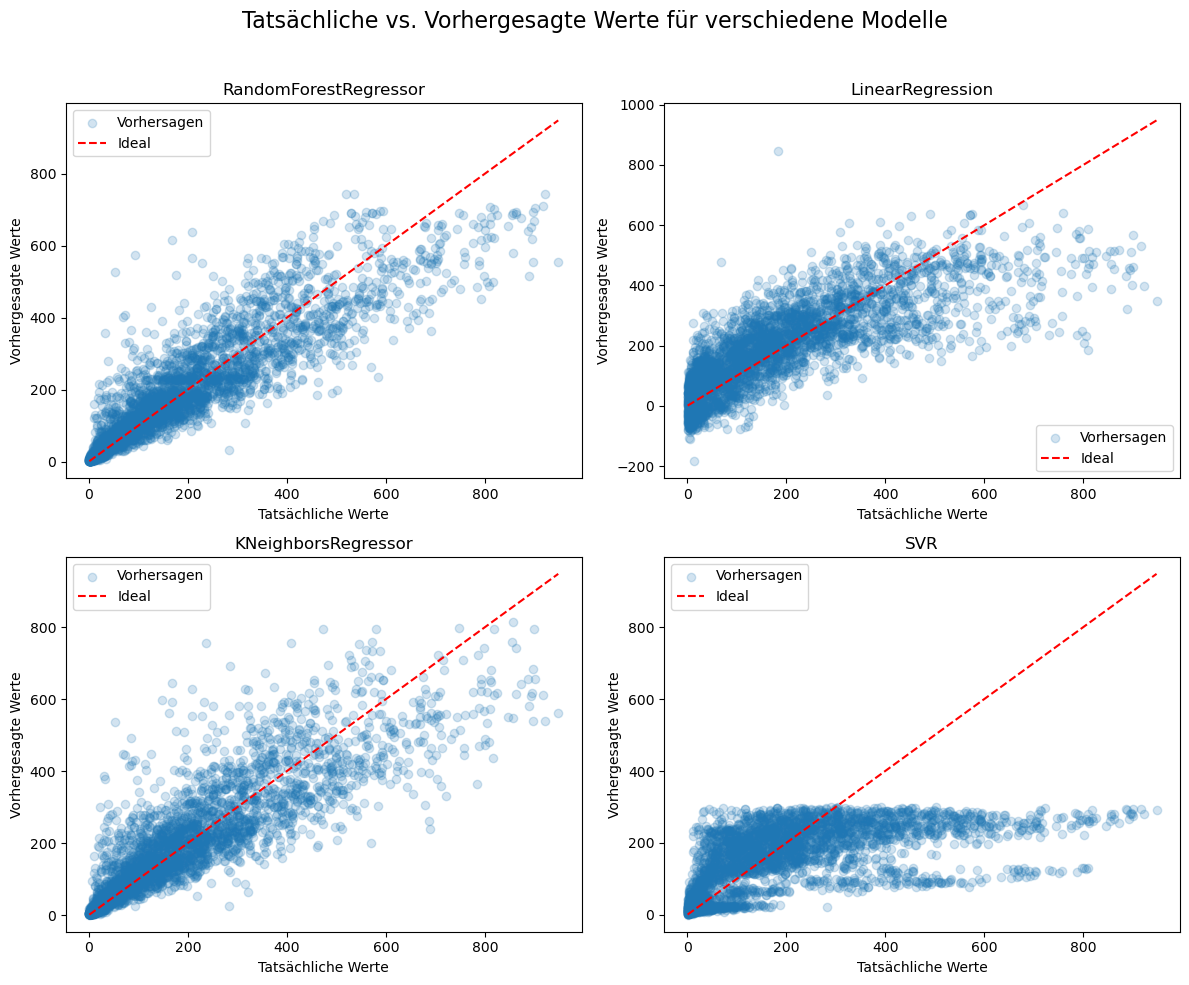

In [15]:
# Subplots erstellen
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Tatsächliche vs. Vorhergesagte Werte für verschiedene Modelle", fontsize=16)

models = [
    ('RandomForestRegressor', YTest_pred_rnf),
    ('LinearRegression', YTest_pred_lr),
    ('KNeighborsRegressor', YTest_pred_knn),
    ('SVR', YTest_pred_svr)
]

# Scatterplots für jedes Modell
for ax, (model_name, predictions) in zip(axes.flatten(), models):
    ax.scatter(YTest, predictions, alpha=0.2, label="Vorhersagen")
    ax.plot([YTest.min(), YTest.max()], [YTest.min(), YTest.max()], color='red', linestyle='--', label="Ideal")
    ax.set_title(f"{model_name}")
    ax.set_xlabel("Tatsächliche Werte")
    ax.set_ylabel("Vorhergesagte Werte")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



<h2>Verbesserung<h2>

<h2>Import<h2>

In [16]:
from sklearn.model_selection import train_test_split

data_verbesserung = pd.read_csv("hour.csv")

<h2>Wetterspalten Verbesserung<h2>

In [17]:
from sklearn.model_selection import train_test_split

data_verbesserung = pd.read_csv("hour.csv")

X = data_verbesserung.drop(columns=["cnt",'dteday', 'mnth', 'yr','holiday', 'casual', 'registered','instant'], axis=1)  # Features
Y = data_verbesserung["cnt"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=22)

<h2>Aufteilung Weekday und Weekend<h2>

In [18]:
from sklearn.model_selection import train_test_split

data_verbesserung = pd.read_csv("hour.csv")

weekday_data = data_verbesserung[data_verbesserung['workingday'] == 1]
weekend_data = data_verbesserung[data_verbesserung['workingday'] == 0]

#Variable weekday_data auf weekend_data wechseln um auf diesen Datensatz unten die Models auszuführen
X = weekday_data.drop(columns=["cnt",'dteday', 'mnth', 'yr','holiday', 'casual', 'registered','instant'], axis=1)  # Features
Y = weekday_data["cnt"]
#Train-Test-Split
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=22)

<h2>Aufteilung der Daten in Spitzen- und Nebenzeiten für präzisere Analyse<h2>

In [19]:
rush_hours = data_verbesserung[
    (data_verbesserung['hr'] >= 5) & (data_verbesserung['hr'] <= 9) |
    (data_verbesserung['hr'] >= 15) & (data_verbesserung['hr'] <= 18)
]

non_rush_hours = data_verbesserung[
    ~(
        (data_verbesserung['hr'] >= 5) & (data_verbesserung['hr'] <= 9) |
        (data_verbesserung['hr'] >= 15) & (data_verbesserung['hr'] <= 18)
    )
]

# Features und Zielvariable festlegen
X = non_rush_hours.drop(columns=["cnt", 'dteday', 'mnth', 'yr', 'holiday', 'casual', 'registered', 'instant'], axis=1)
Y = non_rush_hours["cnt"]


# Train-Test-Split für beide Datensätze
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=22)

<h2>Random Forest Regressors mit Grid Search (Verbesserung)<h2>

In [20]:
from sklearn.metrics import root_mean_squared_error
parameters = {
    'n_estimators': [200],
    'max_depth': [4, 8, 12, 16],
    'min_samples_split': [2, 5]
}

rgr = RandomForestRegressor(random_state=3)
gs = GridSearchCV(rgr, parameters)
gs.fit(XTrain, YTrain)

print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)

best_model = gs.best_estimator_
YTest_pred_rnf = best_model.predict(XTest)

mse_test = mean_squared_error(YTest, YTest_pred_rnf)
rmse_test = root_mean_squared_error(YTest, YTest_pred_rnf) 
r2_test = r2_score(YTest, YTest_pred_rnf)

print(f"Testdaten-MSE: {mse_test:.4f}")
print(f"Testdaten-RMSE: {rmse_test:.4f}")
print(f"Testdaten-R²: {r2_test:.4f}")

Beste Parameter: {'max_depth': 16, 'min_samples_split': 5, 'n_estimators': 200}
Bestes Score: 0.8542120294865153
Testdaten-MSE: 2870.3761
Testdaten-RMSE: 53.5759
Testdaten-R²: 0.8556


<h2>Lineare Regression (Polynomial) mit Gridsearch (Verbesserung)<h2>

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, RegressorMixin

class PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=1):
        self.degree = degree
        self.linear_model = LinearRegression()
        self.poly_features = None

    def fit(self, X, y):
        self.poly_features = PolynomialFeatures(degree=self.degree)
        X_poly = self.poly_features.fit_transform(X)
        self.linear_model.fit(X_poly, y)
        return self

    def predict(self, X):
        X_poly = self.poly_features.transform(X)
        return self.linear_model.predict(X_poly)

parameters = {
    'degree': [3]  # Grad des Polynoms
}

poly_reg = PolynomialRegression()
gs = GridSearchCV(poly_reg, parameters)
gs.fit(XTrain, YTrain)

print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)

# Vorhersagen für Testdaten
best_model = gs.best_estimator_
YTest_pred_lr = best_model.predict(XTest)

# Mean Squared Error und R²-Score berechnen
mse_test = mean_squared_error(YTest, YTest_pred_lr)
r2_test = r2_score(YTest, YTest_pred_lr)

# Mean Squared Error und R²-Score berechnen
print(f"Testdaten-MSE: {mse_test:.4f}")
print(f"Testdaten-R²: {r2_test:.4f}")

Beste Parameter: {'degree': 3}
Bestes Score: 0.7631145637644325
Testdaten-MSE: 4640.4461
Testdaten-R²: 0.7665


<h2>KNNRegressor mit Gridsearch (Verbesserung)<h2>

In [22]:
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 für Manhattan-Distanz, p=2 für euklidische Distanz
}

knn = KNeighborsRegressor()
gs = GridSearchCV(knn, parameters)
gs.fit(XTrain, YTrain)

# Ausgabe der besten Parameter und des besten Scores
print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)

# Vorhersagen für Testdaten
best_model = gs.best_estimator_
YTest_pred_knn = best_model.predict(XTest)

# Berechnung der Scores
mse_test = mean_squared_error(YTest, YTest_pred_knn)
r2_test = r2_score(YTest, YTest_pred_knn)

# Mean Squared Error und R²-Score berechnen
print(f"Testdaten-MSE: {mse_test:.4f}")
print(f"Testdaten-R²: {r2_test:.4f}")

Beste Parameter: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Bestes Score: 0.792211939425729
Testdaten-MSE: 3916.3935
Testdaten-R²: 0.8029


<h2>SVR (Verbesserung)<h2>

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

svr_model = SVR(kernel='rbf')
svr_model.fit(XTrain, YTrain)

# Vorhersagen für Testdaten
YTest_pred_svr = svr_model.predict(XTest)

# Mean Squared Error und R²-Score berechnen
mse_test = mean_squared_error(YTest, YTest_pred_svr)
r2_test = r2_score(YTest, YTest_pred_svr)

print(f"Testdaten-MSE: {mse_test:.4f}")
print(f"Testdaten-R²: {r2_test:.4f}")

Testdaten-MSE: 10851.4891
Testdaten-R²: 0.4539


<h2>Ergebniss plotten<h2>

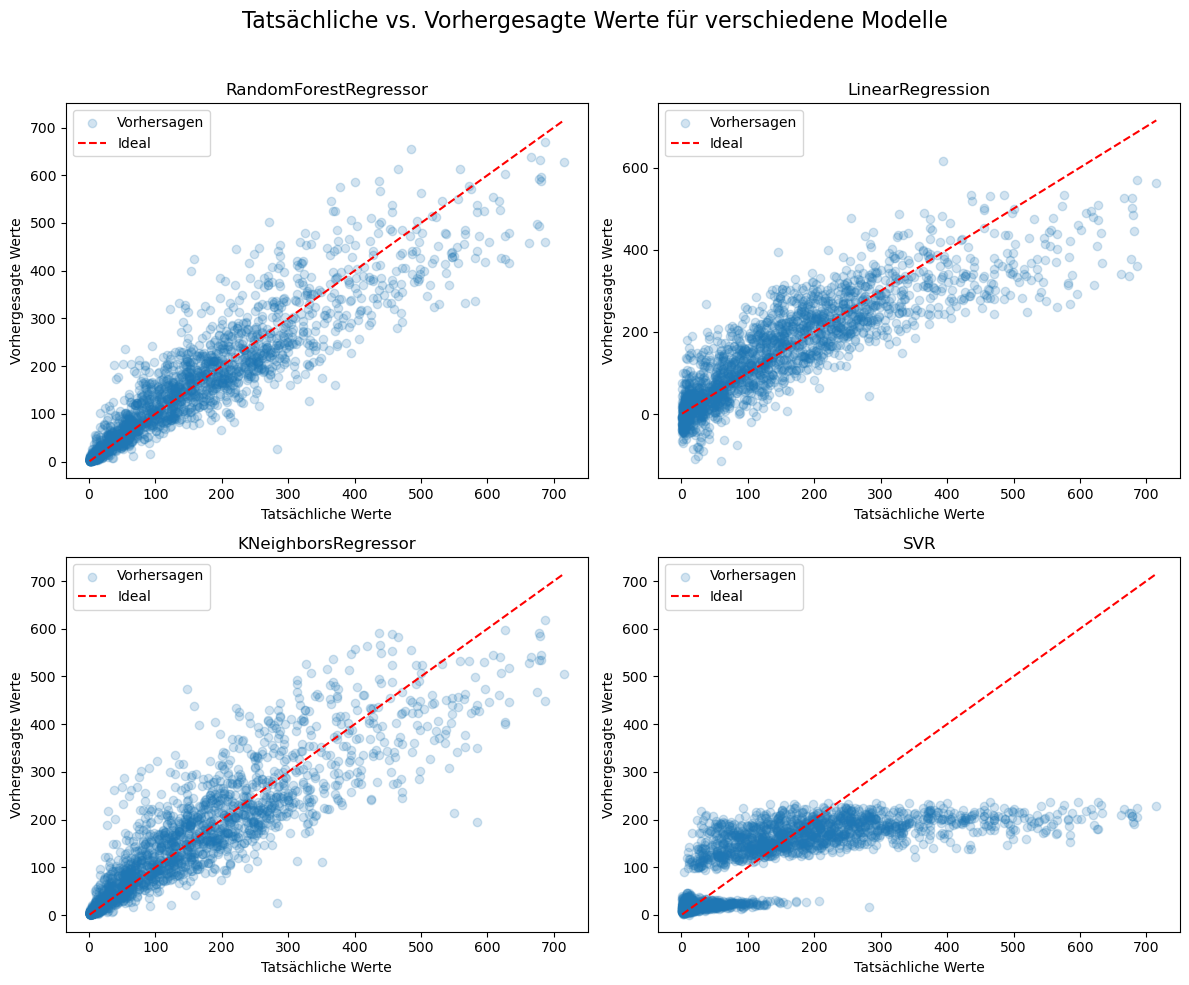

In [24]:
# Subplots erstellen
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Tatsächliche vs. Vorhergesagte Werte für verschiedene Modelle", fontsize=16)

models = [
    ('RandomForestRegressor', YTest_pred_rnf),
    ('LinearRegression', YTest_pred_lr),
    ('KNeighborsRegressor', YTest_pred_knn),
    ('SVR', YTest_pred_svr)
]

# Scatterplots für jedes Modell
for ax, (model_name, predictions) in zip(axes.flatten(), models):
    ax.scatter(YTest, predictions, alpha=0.2, label="Vorhersagen")
    ax.plot([YTest.min(), YTest.max()], [YTest.min(), YTest.max()], color='red', linestyle='--', label="Ideal")
    ax.set_title(f"{model_name}")
    ax.set_xlabel("Tatsächliche Werte")
    ax.set_ylabel("Vorhergesagte Werte")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<h2>Zufällige Vorhersage<h2>

In [25]:
random = np.random.randint(0,len(YTest))
sample = XTest[random]

print(f"Predict: {best_model.predict(sample[np.newaxis,:])}, Wert: {YTest[random]}")

KeyError: 1072